In [1]:
%pip install pydeseq2

Note: you may need to restart the kernel to use updated packages.


In [1]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pydeseq2.default_inference import DefaultInference
import pandas as pd

In [2]:
# Load pre-processed data
SG_CRC_BA = pd.read_csv("SingaporeCRC_data/SG_CRC_BA", index_col=0,delimiter=",")
SG_CRC_BA

,g__Abyssalbus,g__Abyssibius,g__Abyssicoccus,g__Acaryochloris,g__Aceticella,g__Acetilactobacillus,g__Acetivibrio,g__Acetoanaerobium,g__Acetobacter,g__Acetobacterium,...,Age.at.Diagnosis,Site.of.Primary.Colorectal.tumour,Side,Grade,TNM,Stage,iCMS,CMS,group3,group5
patient_id1,,,,,,,,,,,,,,,,,,,,,
1312.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,80.0,Descending colon,Left,2,T2N0(0/18)M0,I,iCMS2,CMS2,iCMS2_MSS,iCMS2_MSS
1643.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,0.0,5.0,7.0,...,65.0,Rectum,Left,2,T2N0(0/20)M0,I,iCMS2,CMS2,iCMS2_MSS,iCMS2_MSS
1586.0,0.0,1.0,0.0,0.0,5.0,0.0,66.0,0.0,1.0,13.0,...,63.0,Sigmoid colon,Left,2,T2N0(0/9)M0,I,iCMS3,CMS3,iCMS3_MSS,iCMS3_MSS
1138.0,0.0,2.0,0.0,0.0,0.0,1.0,19.0,5.0,1.0,2.0,...,51.0,Sigmoid colon,Left,2,pT3N2(7/29)M1,IV,iCMS2,CMS2,iCMS2_MSS,iCMS2_MSS
609.0,0.0,1.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,...,84.0,Ascending colon,Right,2,T3N0(0/12)M0,IIA,iCMS3,CMS3,iCMS3_MSI,iCMS3_MSI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,65.0,Cecum,Right,2,T3N0(0/25)M0,IIA,iCMS2,CMS2,iCMS2_MSS,iCMS2_MSS
1253.0,0.0,2.0,0.0,0.0,0.0,5.0,36.0,8.0,0.0,8.0,...,39.0,Sigmoid colon,Left,2,T3N0(0/18)M0,IIB,iCMS3,CMS1,iCMS3_MSI,iCMS3_MSI
1662.0,3.0,1.0,0.0,1.0,0.0,5.0,111.0,7.0,1.0,73.0,...,67.0,Rectum,Left,2,T3N1a(1/36)M0,IIIB,iCMS3,CMS3,iCMS3_MSS,iCMS3_MSS


In [4]:
# Prepare features and target variable
X = SG_CRC_BA.drop(['TMB', 'KRAS', 'BRAF', 'NRAS', 'TP53', 'APC', 'PIK3CA', 'PIK3R1',
       'SMAD4', 'ERBB4', 'RNF43', 'ZNRF3', 'KIT', 'TGFBR2', 'Vital.status',
       'MSI.Status', 'CRIS', 'Gender', 'Age.at.Diagnosis',
       'Site.of.Primary.Colorectal.tumour', 'Side', 'Grade', 'TNM', 'Stage',
       'iCMS', 'CMS', 'group3', 'group5'], axis=1)


In [5]:
metadata = pd.DataFrame(zip(SG_CRC_BA.index,SG_CRC_BA['Gender']), columns = ['Sample_ID','Condition'])

In [6]:
metadata = metadata.set_index('Sample_ID')
metadata

,Condition
Sample_ID,
1312.0,Male
1643.0,Female
1586.0,Male
1138.0,Female
609.0,Female
...,...
1237.0,Male
1253.0,Male
1662.0,Male


In [7]:
X_scaled = X.astype('int')

inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(counts=X_scaled,
             metadata=metadata,
             design_factors="Condition",
             refit_cooks=True,
             inference=inference,
             )
dds

c:\Anaconda\Lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 113 × 1905
    obs: 'Condition'
    obsm: 'design_matrix'

In [8]:
# Compute normalization factors

dds.fit_size_factors()

dds.obsm["size_factors"]

# %%
# Fit genewise dispersions

dds.fit_genewise_dispersions()

dds.varm["genewise_dispersions"]

# %%
# Fit dispersion trend coefficients

dds.fit_dispersion_trend()
dds.uns["trend_coeffs"]
dds.varm["fitted_dispersions"]

# %%
# Dispersion priors

dds.fit_dispersion_prior()
print(
    f"logres_prior={dds.uns['_squared_logres']}, sigma_prior={dds.uns['prior_disp_var']}"
)

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.21 seconds.

Fitting dispersion trend curve...


logres_prior=0.7187736894411308, sigma_prior=0.700592372077909


... done in 0.03 seconds.



In [9]:
dds.fit_MAP_dispersions()
dds.varm["MAP_dispersions"]
dds.varm["dispersions"]
dds.fit_LFC()
dds.varm["LFC"]
dds.calculate_cooks()
if dds.refit_cooks:
    dds.refit()

Fitting MAP dispersions...
... done in 0.24 seconds.

Fitting LFCs...
... done in 0.26 seconds.

Replacing 555 outlier genes.

Fitting dispersions...
... done in 0.18 seconds.

Fitting MAP dispersions...
... done in 0.18 seconds.

Fitting LFCs...
... done in 0.18 seconds.



In [10]:
stat_res = DeseqStats(dds, alpha=0.05, cooks_filter=True, independent_filter=True)

In [11]:
stat_res.run_wald_test()
stat_res.p_values

Running Wald tests...
... done in 0.19 seconds.



g__Abyssalbus         0.808164
g__Abyssibius         0.120182
g__Abyssicoccus       0.884230
g__Acaryochloris      0.647821
g__Aceticella         0.048757
                        ...   
g__Zobellia           0.096094
g__Zophobihabitans    0.878496
g__Zunongwangia       0.076335
g__Zymobacter         0.727801
g__Zymomonas          0.940006
Length: 1905, dtype: float64

In [12]:
if stat_res.cooks_filter:
    stat_res._cooks_filtering()
stat_res.p_values

g__Abyssalbus         0.808164
g__Abyssibius         0.120182
g__Abyssicoccus       0.884230
g__Acaryochloris      0.647821
g__Aceticella         0.048757
                        ...   
g__Zobellia           0.096094
g__Zophobihabitans    0.878496
g__Zunongwangia       0.076335
g__Zymobacter         0.727801
g__Zymomonas          0.940006
Length: 1905, dtype: float64

In [13]:
# P-value adjustment

if stat_res.independent_filter:
    stat_res._independent_filtering()
else:
    stat_res._p_value_adjustment()

stat_res.padj

g__Abyssalbus              NaN
g__Abyssibius         0.443699
g__Abyssicoccus            NaN
g__Acaryochloris           NaN
g__Aceticella         0.297332
                        ...   
g__Zobellia           0.399996
g__Zophobihabitans         NaN
g__Zunongwangia       0.381881
g__Zymobacter         0.890839
g__Zymomonas               NaN
Name: 33, Length: 1905, dtype: float64

In [14]:
stat_res.summary()

Log2 fold change & Wald test p-value: Condition Male vs Female
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
g__Abyssalbus       0.106741        0.475569  1.958719  0.242796  0.808164   
g__Abyssibius       1.353284       -0.513479  0.330422 -1.554010  0.120182   
g__Abyssicoccus     0.118264       -0.155921  1.070816 -0.145609  0.884230   
g__Acaryochloris    0.364348        0.316660  0.693227  0.456791  0.647821   
g__Aceticella       1.619064        1.062855  0.539326  1.970708  0.048757   
...                      ...             ...       ...       ...       ...   
g__Zobellia         2.675384        0.648846  0.389910  1.664094  0.096094   
g__Zophobihabitans  0.087826       -0.236564  1.547418 -0.152876  0.878496   
g__Zunongwangia     0.803872       -1.355637  0.764876 -1.772362  0.076335   
g__Zymobacter       3.009403       -0.095400  0.274096 -0.348052  0.727801   
g__Zymomonas        0.088511        0.099184  1.317842  0.075263  0.940006   



In [15]:
stat_res.lfc_shrink(coeff="Condition_Male_vs_Female")

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: Condition Male vs Female
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
g__Abyssalbus       0.106741        0.035798  1.071948  0.242796  0.808164   
g__Abyssibius       1.353284       -0.204233  0.299082 -1.554010  0.120182   
g__Abyssicoccus     0.118264       -0.021744  0.343947 -0.145609  0.884230   
g__Acaryochloris    0.364348       -2.648758  0.575155  0.456791  0.647821   
g__Aceticella       1.619064        2.427884  0.531815  1.970708  0.048757   
...                      ...             ...       ...       ...       ...   
g__Zobellia         2.675384        0.235610  0.351297  1.664094  0.096094   
g__Zophobihabitans  0.087826       -0.018011  0.324802 -0.152876  0.878496   
g__Zunongwangia     0.803872       -0.085937  0.316852 -1.772362  0.076335   
g__Zymobacter       3.009403       -0.038986  0.225754 -0.348052  0.727801   
g__Zymomonas        0.088511        0.022747  0.401281  0.075263  0.9400

... done in 0.21 seconds.



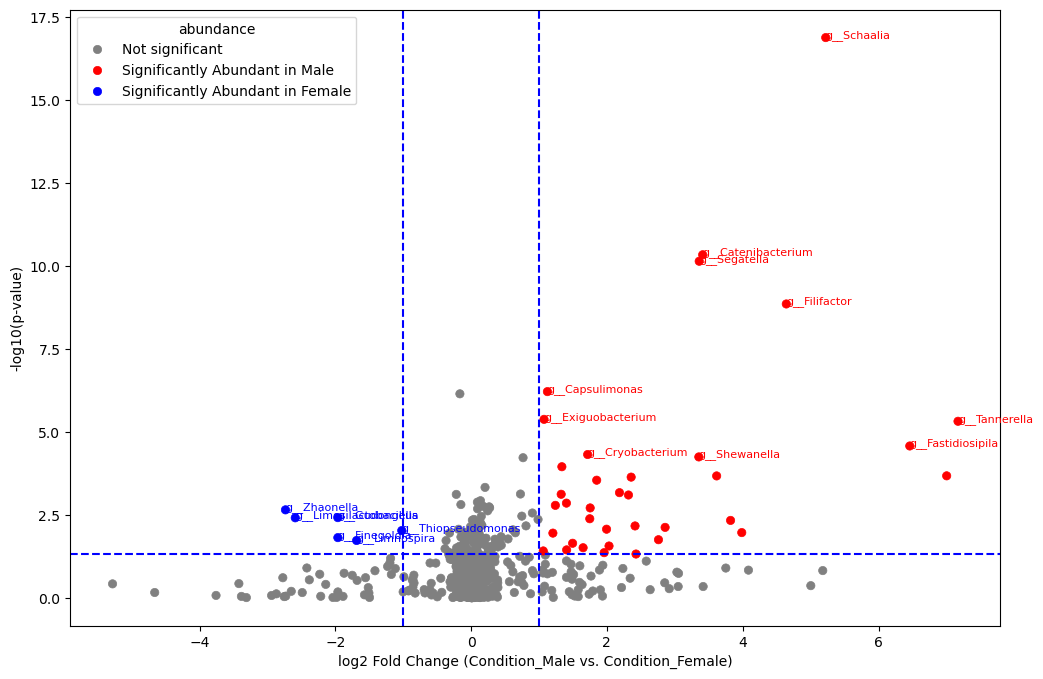

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

results_df = stat_res.results_df

# Extract the relevant columns
log2fc = results_df["log2FoldChange"]
pvals = results_df["pvalue"]
neg_log10_pvals = -np.log10(pvals)

df = pd.DataFrame({
    "microbe": X.columns,
    "log2FoldChange": log2fc,
    "-log10(pvalue)": neg_log10_pvals,
    "pvalue": pvals
})

# Define significance thresholds
pval_threshold = 0.05
log2fc_threshold = 1

# Add a column for microbial abundance
df["abundance"] = np.where((df["pvalue"] < pval_threshold) & (df["log2FoldChange"] > log2fc_threshold), 'Significantly Abundant in Male',
                           np.where((df["pvalue"] < pval_threshold) & (df["log2FoldChange"] < -log2fc_threshold), 'Significantly Abundant in Female', 'Not significant'))

# Filter the DataFrame to get lists of top 10 microbes
top_10_in_male = df[df["abundance"] == "Significantly Abundant in Male"].nlargest(10, "-log10(pvalue)")
top_10_in_female = df[df["abundance"] == "Significantly Abundant in Female"].nlargest(10, "-log10(pvalue)")

plt.figure(figsize=(12, 8))
palette = {'Significantly Abundant in Male': 'red', 'Significantly Abundant in Female': 'blue', 'Not significant': 'grey'}
sns.scatterplot(data=df, x="log2FoldChange", y="-log10(pvalue)", hue="abundance", palette=palette, edgecolor=None)
plt.xlabel('log2 Fold Change (Condition_Male vs. Condition_Female)')
plt.ylabel('-log10(p-value)')
plt.axhline(y=-np.log10(pval_threshold), color='blue', linestyle='--')  # p-value threshold line
plt.axvline(x=log2fc_threshold, color='blue', linestyle='--')  # log2FC threshold lines
plt.axvline(x=-log2fc_threshold, color='blue', linestyle='--')

# Label the top 10 points in each category
for i in range(top_10_in_male.shape[0]):
    plt.text(top_10_in_male["log2FoldChange"].iloc[i], top_10_in_male["-log10(pvalue)"].iloc[i], 
             top_10_in_male["microbe"].iloc[i], fontsize=8, color='red')

for i in range(top_10_in_female.shape[0]):
    plt.text(top_10_in_female["log2FoldChange"].iloc[i], top_10_in_female["-log10(pvalue)"].iloc[i], 
             top_10_in_female["microbe"].iloc[i], fontsize=8, color='blue')

plt.show()


In [18]:
# Print the lists of top 10 microbes in MSS
print("Top 10 Microbes Abundant in MSS:")
for i, microbe in enumerate(top_10_in_male["microbe"], 1):
    print(f"{i}. {microbe}")

Top 10 Microbes Abundant in MSS:
1. g__Schaalia
2. g__Catenibacterium
3. g__Segatella
4. g__Filifactor
5. g__Capsulimonas
6. g__Exiguobacterium
7. g__Tannerella
8. g__Fastidiosipila
9. g__Cryobacterium
10. g__Shewanella


In [19]:
# Print the lists of top 10 microbes in MSI
print("\nTop 10 Microbes Abundant in MSI:")
for i, microbe in enumerate(top_10_in_female["microbe"], 1):
    print(f"{i}. {microbe}")


Top 10 Microbes Abundant in MSI:
1. g__Zhaonella
2. g__Gudongella
3. g__Limosilactobacillus
4. g__Thiopseudomonas
5. g__Finegoldia
6. g__Limnospira
